<a href="https://colab.research.google.com/github/EricDataScienc/An-lise-Explorat-ria/blob/main/An%C3%A1lise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Carregamento de dados

In [ ]:
df_insumos = pd.read_json('/content/dados_insumos.json')
df_maquinas = pd.read_json('/content/dados_maquinas.json')
df_turnos = pd.read_json('/content/dados_turnos.json')

In [ ]:
# pré analise de dados
df_insumos.info()
df_insumos.columns
df_insumos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nome       3 non-null      object
 1   nivel      3 non-null      object
 2   st         3 non-null      object
 3   cor        3 non-null      object
 4   historico  3 non-null      object
dtypes: object(5)
memory usage: 252.0+ bytes


,nome,nivel,st,cor,historico
0,Soda Cáustica,22%,CRÍTICO,red,"[{'data': '2025-07-01', 'pct': 95}, {'data': '..."
1,Resina Imp.,10%,CRÍTICO,red,"[{'data': '2025-07-01', 'pct': 90}, {'data': '..."
2,Madeira,12.500 m³,Normal,green,[]


In [ ]:
df_maquinas.info()
df_maquinas.columns
df_maquinas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3 non-null      int64 
 1   nome       3 non-null      object
 2   setor      3 non-null      object
 3   status     3 non-null      object
 4   gps        3 non-null      object
 5   dados      3 non-null      object
 6   alerta     1 non-null      object
 7   historico  3 non-null      object
dtypes: int64(1), object(7)
memory usage: 324.0+ bytes


,id,nome,setor,status,gps,dados,alerta,historico
0,1,MP-01: Picador,Pátio,ok,RJ,"[{'k': 'RPM', 'v': '1200'}]",None,"[{'data': '2025-07-01', 'producao': 450, 'temp..."
1,2,MP-02: Digestor,Químico,warn,SC,"[{'k': 'Pressão', 'v': '8.8 bar'}]",Pressão Crítica,"[{'data': '2025-07-01', 'producao': 320, 'temp..."
2,3,MP-03: Secagem,Acabamento,ok,BA,"[{'k': 'Velocidade', 'v': '1100'}]",None,"[{'data': '2025-10-05', 'producao': 300, 'temp..."


In [ ]:
df_turnos.info()
df_turnos.columns
df_turnos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    12 non-null     object
 1   turno   12 non-null     object
 2   maq     12 non-null     int64 
 3   op      12 non-null     object
 4   obs     12 non-null     object
dtypes: int64(1), object(4)
memory usage: 612.0+ bytes


,data,turno,maq,op,obs
0,10/01,Manhã,3,Carlos L.,OK
1,10/01,Tarde,2,Mariana S.,Falha Pressão
2,12/02,Manhã,3,João P.,OK
3,12/02,Noite,1,Renata M.,Parada Não Planejada
4,15/03,Manhã,3,Carlos L.,OK


# Engenharia de dados

In [ ]:
historico_mp02 = pd.DataFrame({
    "mes": ["Jul/25", "Set/25", "Dez/25", "Jan/26"],
    "temperatura": [160, 165, 172, 175]
})

In [ ]:
maquinas = pd.DataFrame({
    "maquina": ["MP-01", "MP-02", "MP-03"],
    "temperatura": [160, 175, 155],
    "pressao": [7.5, 8.8, 7.2],
    "status": ["ok", "warn", "ok"]
})

In [ ]:
turnos = pd.DataFrame({
    'data':['10/01','10-01','12/02','12/02'],
    'turno':['Manha','Tarde','Manha','Noite'],
    'maquina':['MP-03','MP-02','MP-03','MP-01'],
    'operador':['Carlos L.','Mariana S.','Joao P.','Renata M.'],
    'obs':['OK','Falha Pressão','OK','Parada Não Planejada']
})

# Graficos

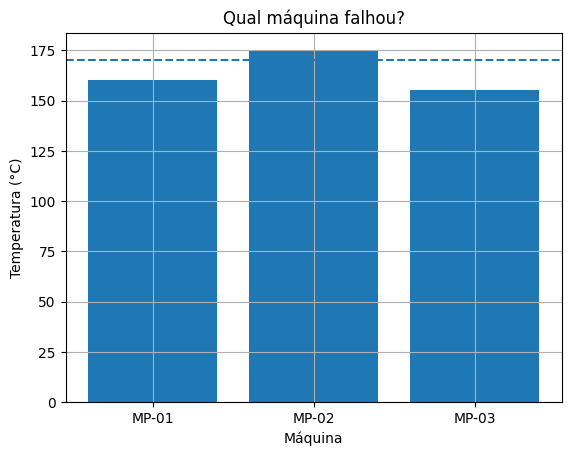

In [ ]:
# Qual máquina falhou?
plt.bar(maquinas["maquina"], maquinas["temperatura"])
plt.axhline(y=170, linestyle="--")
plt.title("Qual máquina falhou?")
plt.xlabel("Máquina")
plt.ylabel("Temperatura (°C)")
plt.grid()
plt.show()

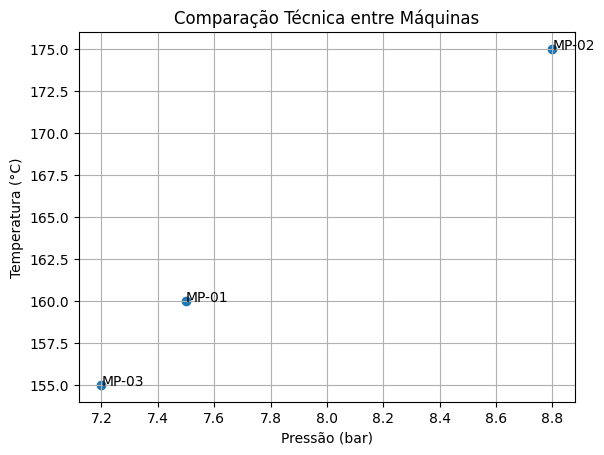

In [ ]:
# Por que a máquina falhou? (Causa Técnica)
plt.scatter(maquinas["pressao"], maquinas["temperatura"])
for i, nome in enumerate(maquinas["maquina"]):
    plt.text(maquinas["pressao"][i], maquinas["temperatura"][i], nome)

plt.title("Comparação Técnica entre Máquinas")
plt.xlabel("Pressão (bar)")
plt.ylabel("Temperatura (°C)")
plt.grid()
plt.show()

In [ ]:
# Houve falha humana? (Causa Operacional)
turnos['houve_falha'] = turnos['obs'].apply(
    lambda x: 'Sim' if x != 'OK' else 'Não'
)

tabela_falhas = turnos[turnos['houve_falha'] == 'Sim'][
    ['data', 'turno', 'maquina', 'operador', 'obs']
]

print(tabela_falhas)

    data  turno maquina    operador                   obs
1  10-01  Tarde   MP-02  Mariana S.         Falha Pressão
3  12/02  Noite   MP-01   Renata M.  Parada Não Planejada
